<div align="right" style="text-align: right"><i>Peter Norvig<br>Aug 2019</i></div>

# Photography Focal Length Charts

Photographers with interchangable-lens cameras  often obsess about which lenses they use. This is especially true when planning a trip, and trying to balance how much to pack versus what might be needed. One big factor is the **focal lengths** to be covered. This notebook will help understand what range of focal lengths was used in a collection of photos, to help you plan the next trip.  Charts from this notebook appear in my [Galapagos Photography Trip Report](https://norvig.com/galapagos-photography.html).

<p><a href="https://www.the-digital-picture.com/Photography-Tips/packing-for-landscape-photography-trip.aspx"><img src="https://media.the-digital-picture.com/Images/Other/Lowepro-Photo-Trekker-AW-II-Backpack-Loaded.jpg" width="300"></a>

# Preparing the Focal Length Data

In your photo editing system, export (or copy down manually) a table of focal lengths of photos. (I did it only for my **best** photos.) Arrange the data in the following Python format:

    {trip_name: {
     lens_name: [focal_length, ...]}}
    
For example:
    
    {2008: {
     '100-400': [100, 100, 100, 115, 130, ... 400, 400, 400, 400, 400, 400]}}
    
For each of my photos I considered two variations of focal length:
1. The actual focal length setting of the lens when the photo was taken (as recorded in the EXIF data).
2. The [35mm equivalent focal length](https://en.wikipedia.org/wiki/35_mm_equivalent_focal_length), taking account both the crop factor of the sensor (if any), and any cropping done in photo editing. For example, if the focal length of the lens/photo was 200mm, but I was using a camera with a 1.5x crop, and then I further cropped the image down to half the size in both width and height, then the equivalent focal length would be 200mm x 1.5 x 2 = 600mm. 

I collected these two data sets at different times, and over time my definition of **best** changed, so they are not for the exact same photos.


In [1]:
actual = { # Actual focal lengths 
    2008: {
    '17-40':   (*[17]*9, *[40]*5),
    '24-105':  (24, 24, 105),
    '100-400': (*[100]*3, 115, 130, 135, *[150]*3, 210, 220, 260, 300, 330,  
                350, 350, 360, 365, 365, 380, 380, *[400]*36)},
    2014: {
    '16-35':   (*[16]*7, 17, 26, *[35]*4),
    '24-70':   (*[24]*3, 28, 28, 45, 47, 58, *[70]*3),
    '70-300':  (70, 70, 116, 170, 170, 176, 200, 221, 244, 260, 277, 277, *[300]*24),
    '150-600': (150, 165, 173, 200, 250, 256, 300, 309, 309, 309, 309, 329, 350, 
                350, 350, 400, 400, 428, 450, 483, 483, 483, 483, 483, 483, 
                500, 500, 500, 500, 500, 552, 552, *[600]*25)},
    2019: {
    '16-35':   (*[35]*5, *[16]*3, 23, 24),
    '70-200':  (*[200]*9, *[280]*5, 168, 170, 142, 168, 185, *[180]*5, 105, 190, 145, 155),
    '100-400': (*[400]*28, 278, 286, 300, 286, 371, 300, 300, 300, 349, 330, 371, 200, 164, 
                349, 397, 100),
    '400':     (*[400]*6, 560, *[800]*3)}}

In [2]:
print(tuple(sorted((150, 150, 165, 173, 173, 182, 200, 250, 250, 256, 256, 300, 300, 
                *[309]*9, 329, 329, *[350]*5, 375, *[400]*4, 428, 428, 450, 450, 
                *[483]*11, *[500]*11, *[552]*4))[0::2]))

(150, 165, 173, 200, 250, 256, 300, 309, 309, 309, 309, 329, 350, 350, 350, 400, 400, 428, 450, 483, 483, 483, 483, 483, 483, 500, 500, 500, 500, 500, 552, 552)


In [3]:
equiv = { # 35mm equivalent focal lengths (after cropping)
    2008: {
    '17-40':   (75, 55, 27, 62, 17, 17, 17, 17, 17, 24, 17, 17, 17, 17),
    '24-105':  (58, 105, 116),
    '100-400': (668, 400, 766, 549, 509, 130, 150, 548, 428, 588, 405, 247, 656, 858,
                400, 159, 559, 398, 295, 427, 513, 554, 694, 317, 666, 562, 507, 491,
                552, 861, 528, 252, 304, 100, 554, 400, 248, 400, 545, 542, 145, 533,
                234, 538, 577, 667, 648, 400, 188, 407, 400, 400, 400, 400, 400, 400, 200)},
    2014: {
    '16-35':   (16, 26, 24, 45, 36, 25, 16, 35, 18, 16, 47, 16),
    '24-70':   (24, 47, 49, 24),
    '70-300':  (262, 270, 208, 1037, 675, 425, 382, 738, 428, 673, 70, 309, 215, 416,
                221, 503, 462, 300, 551, 512, 471, 296, 423, 947, 758, 232, 373, 476,
                656, 532, 664, 1004, 664, 537, 439),
    '150-600': (1406, 331, 254, 552, 393, 758, 934, 725, 935, 875, 727, 991, 751, 949,
                804, 1172, 1304, 1037, 197, 472, 422, 468, 413, 892, 797, 965, 1191,
                1061, 885, 167, 395, 1059, 946, 868, 1227, 453, 444, 592, 1468, 372,
                1469, 970, 240, 1103, 689, 592)},
    2019: {
    '16-35':   (35, 26, 35, 35, 34, 16, 24, 16, 16),
    '70-200':  (200, 200, 168, 170, 142, 207, 475, 168, 185, 180, 141, 280, 280, 385,
                425, 254, 358, 262, 200, 190, 206, 187, 221, 212, 336, 242, 209, 477),
    '100-400': (438, 724, 583, 703, 278, 300, 286, 286, 400, 431, 371, 335, 481, 400, 400,
                621, 525, 308, 400, 406, 427, 371, 606, 400, 400, 261, 476, 188, 588, 397),
    '400':     (1414, 1381, 800, 836, 668, 491, 668, 491, 400, 400)}}

# Plotting Histograms

I want to see the range of shots made with each lens, and I also want to see the overall number and range of shots. So I got the idea to make a plot where every shot gets a hashmark, where the x-axis of the hashmark is the focal length, and the y-axis is the cumulative number of shots for that lens, sorted in ascending focal-length order. In other words, a kind of cumulative step histogram. This would get messy if the lenses overlapped in focal length a lot, but for me they didn't. The function `shot_plots` does this. 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def shot_plots(table, label='35mm equivalent', hidden=None):
    """Display and save to a file a chart of focal lengths."""
    for name, trip in table.items():
        filename = f'shots-{name}-{label[:2]}.png'.lower()
        N = sum(len(trip[lens]) for lens in trip)
        plt.figure(figsize=(6.5, 4.5))
        plt.rcParams.update({'font.size': 12})
        plt.xlabel(f'Focal length ({label})')
        plt.ylabel('Cumulative number of shots')
        plt.title(f'{name} Best {N} shots ({label} focal length)')
        plt.grid(b=True, which='major', color='grey', linestyle=':')
        if hidden: plt.plot(*hidden, color='white', alpha=0)
        for lens, mark in zip(trip, '_x.+'*9):
            X = sorted(trip[lens])
            Y = range(1, len(X) + 1)
            plt.plot(X, Y, '_', ms=9, mew=1.5, label=lens + f'mm: {len(X)}', marker=mark)
        plt.legend(loc=2, fontsize='small')
        plt.savefig(filename)
        plt.show()

# Actual Focal Length Plots

The actual lens focal length data. This makes it clear how often I was at the very far end of my 400mm, 300mm, and 600mm zooms:

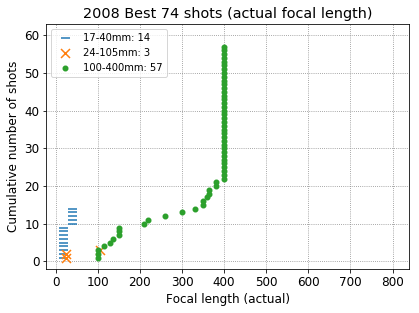

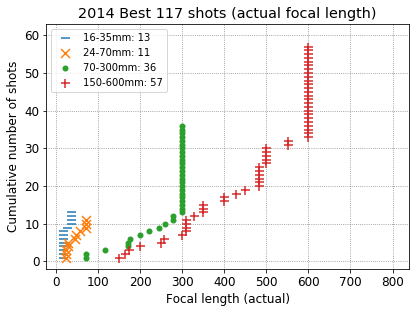

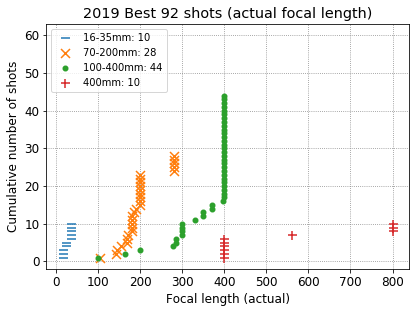

In [5]:
shot_plots(actual, label='actual', hidden=([800], [60]))

# 35mm Equivalent Focal Length Plots

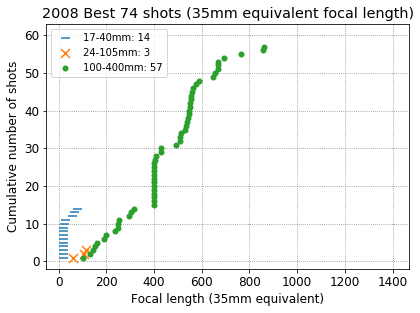

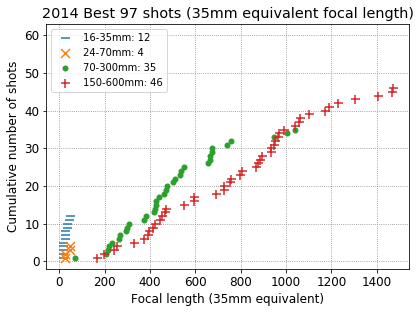

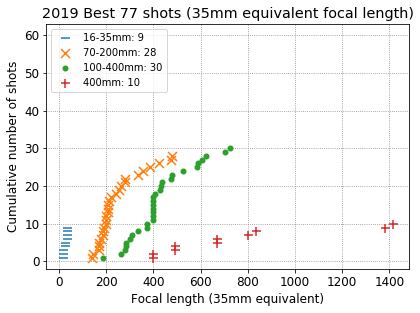

In [6]:
shot_plots(equiv, hidden=([1400], [60]))

# Totals (Actual and Equivalent)

Here I aggregate all the shots (all lens and all trips) together.  Again, the two data sets (actual and equivalent) were collected at different times with different definitions of **best** photos, so they have different totals.

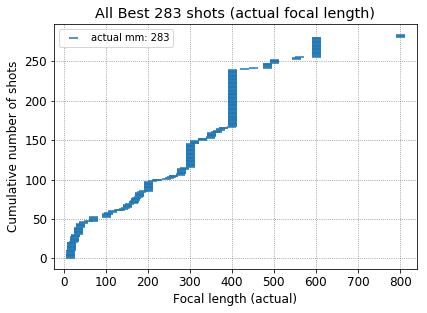

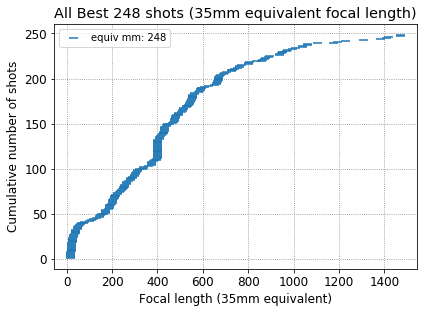

In [7]:
def all_shots(table): return [m for y in table for lens in table[y] 
                              for m in table[y][lens]]

shot_plots({'All': {'actual ': all_shots(actual)}}, 'actual') 
shot_plots({'All': {'equiv ':  all_shots(equiv)}})